#### $$\textbf{Estimation of CKLS Model's Parameters using GMM Method}$$
### $$\texttt{Stochastic differential calculus}$$
$$ \small{\textbf{MANDI SOUHIL}} $$

In [76]:
from gmm_estim import *

In [77]:
np.random.seed(0)

### $\textbf{Test on synthetic data}$

In [78]:
# True parameters
theta_true = np.array([0.2, -0.5, 0.02, 0.6])

# Generate sample data
r_sample = generate_rt(theta_true, r0=0.03, T=1000)

# Initial guess
theta_init = np.array([0.01, 0.0, 0.01, 0.1])

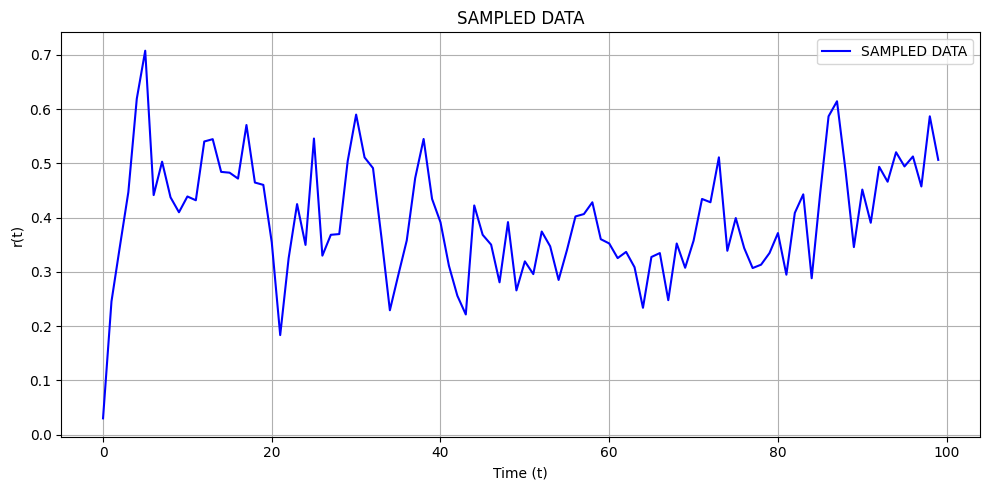

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(r_sample[:100], label='SAMPLED DATA', color='blue')
plt.title('SAMPLED DATA')
plt.xlabel('Time (t)')
plt.ylabel('r(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

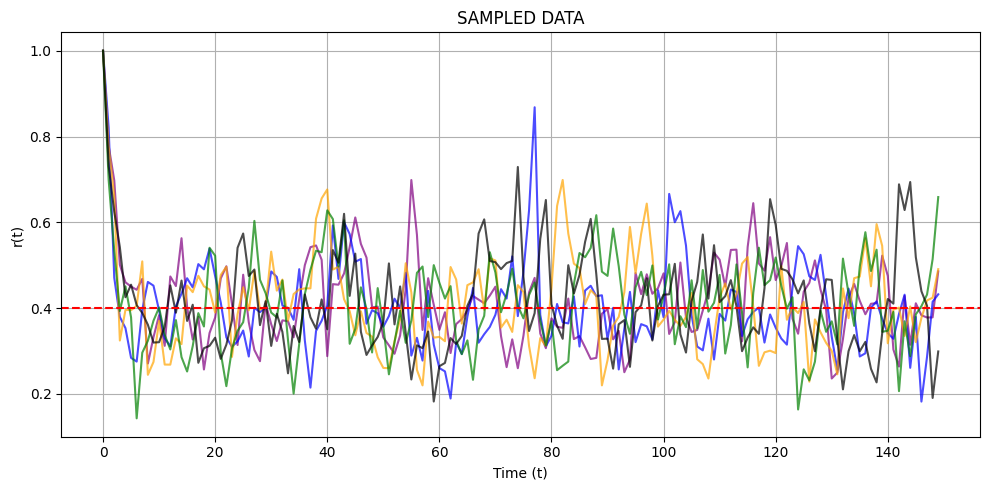

In [80]:
# simulate 20 paths and plot them
plt.figure(figsize=(10, 5))
for i in range(5):
    r_sample = generate_rt(theta_true, r0=1, T=1000)
    plt.plot(r_sample[:150], color=np.random.choice(['blue', 'green', 'purple', 'black', 'orange']), alpha=0.7)
# plot y line of y = - alpha / beta
plt.axhline(y=-theta_true[0] / theta_true[1], color='red', linestyle='--')
plt.title('SAMPLED DATA')
plt.xlabel('Time (t)')
plt.ylabel('r(t)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
theta_estimated = estimate_gmm(r_sample, theta_init)

print("True parameters:     ", theta_true)
print("Estimated parameters:", theta_estimated)

True parameters:      [ 0.2  -0.5   0.02  0.6 ]
Estimated parameters: [ 0.19420757 -0.48554175  0.01706823  0.49345157]


In [82]:
_,theta_estimated_updated_matrix,_ = estimate_two_step_gmm(r_sample, theta_init)

print("True parameters:     ", theta_true)
print("Estimated parameters:", theta_estimated_updated_matrix.x)

True parameters:      [ 0.2  -0.5   0.02  0.6 ]
Estimated parameters: [ 0.1942074  -0.48554132  0.01706813  0.4934487 ]


to test residuals, we preform the following statistical tests :
| Test               | Null Hypothesis                      | If p < 0.05                   |
| ------------------ | ------------------------------------ | ----------------------------- |
| Mean Zero (t-test) | Residuals have mean zero             | Bias exists (bad fit)         |
| Ljung-Box          | No autocorrelation in residuals      | Residuals are autocorrelated  |
| Breusch-Pagan      | Homoscedasticity (constant variance) | Residuals are heteroscedastic |
| Jarque-Bera        | Residuals are normally distributed   | Non-normal residuals          |


In [83]:
res1 = compute_residuals(r_sample, theta_estimated)
res2 = compute_residuals(r_sample, theta_estimated_updated_matrix.x)

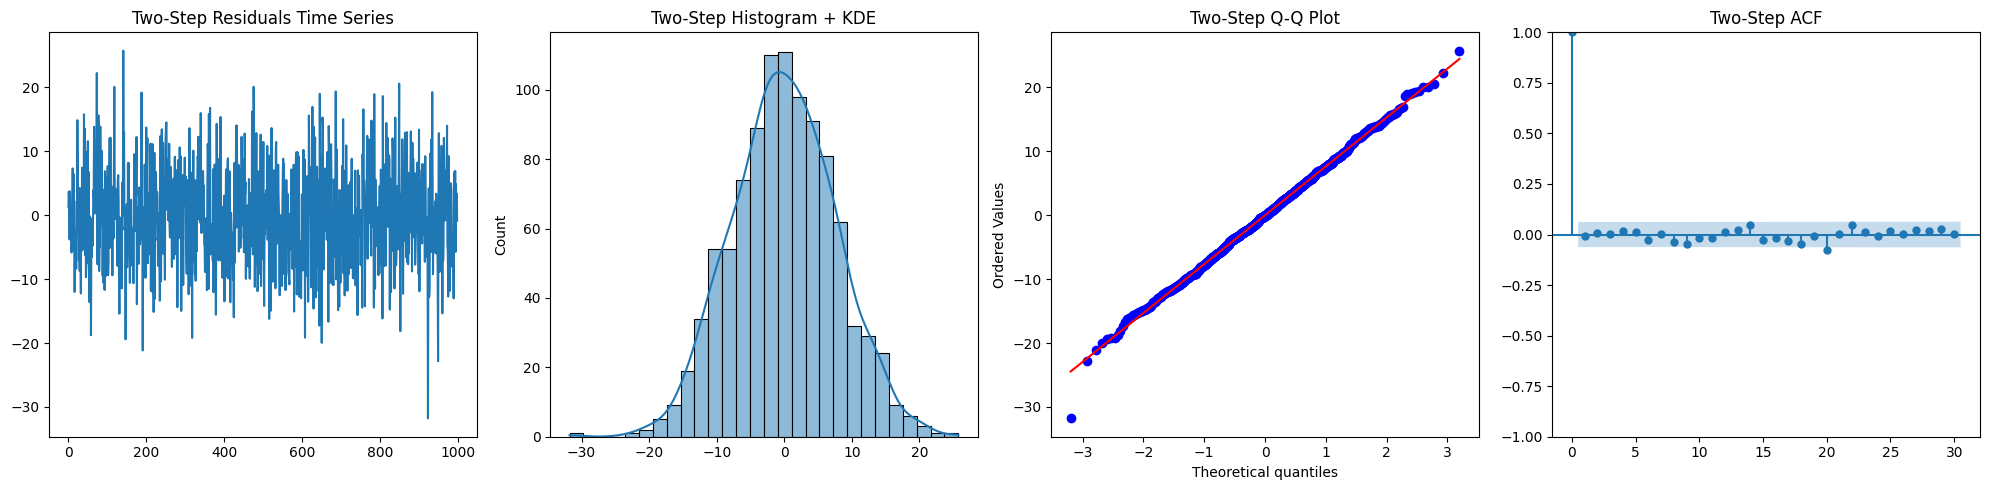


| Test               | Null Hypothesis                      | If p < 0.05                   |
|--------------------|--------------------------------------|-------------------------------|
| Mean Zero (t-test) | Residuals have mean zero             | Bias exists (bad fit)         |
| Ljung-Box          | No autocorrelation in residuals      | Residuals are autocorrelated  |
| Breusch-Pagan      | Homoscedasticity (constant variance) | Residuals are heteroscedastic |
| Jarque-Bera        | Residuals are normally distributed   | Non-normal residuals          |


Two-Step Residuals:

Mean Zero Test: t = 0.022, p = 0.982 → Mean zero
[Ljung-Box] Q(10) = 0.056, p = 0.812 → No autocorr

Breusch-Pagan Test:
[Breusch–Pagan] p = 0.574 → Homoskedastic

Jarque-Bera Normality Test: JB stat = 0.323, p = 0.851 → Normal



In [84]:
plot_residual_diagnostics([res1], ['Two-Step'], r_sample)

### $\textbf{Test on intrest rate data}$

[Link to the data of treasury rate](https://fred.stlouisfed.org/categories/115)

In [85]:
import pandas as pd

In [88]:
data_daily = pd.read_csv('data_day.csv')
data_weekly = pd.read_csv('data_week.csv')
data_monthly = pd.read_csv('data_month.csv')

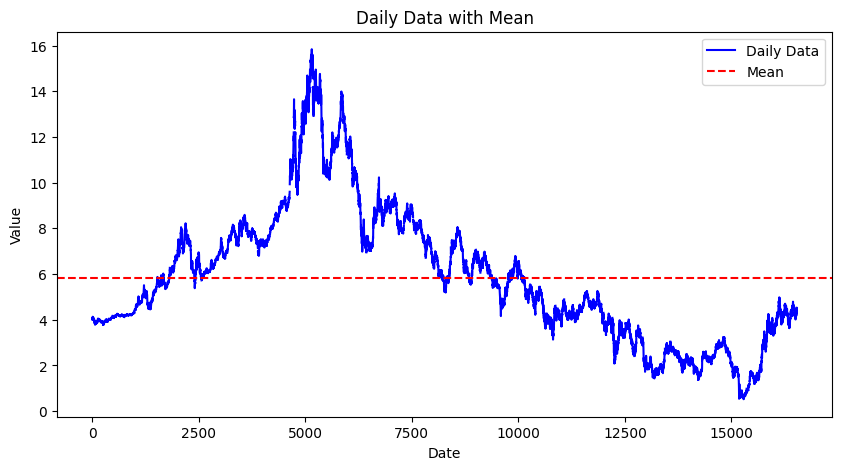

In [90]:
# we calcualte the mean of the daily data
values = data_daily['DGS10']
mean = np.mean(values)
# we plot the mean of the daily data with the data
plt.figure(figsize=(10, 5))
plt.plot(data_daily['DGS10'], label='Daily Data', color='blue')
plt.axhline(y=mean, color='red', linestyle='--', label='Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Daily Data with Mean')
plt.legend()

Data: Daily
Size of the data:  16534


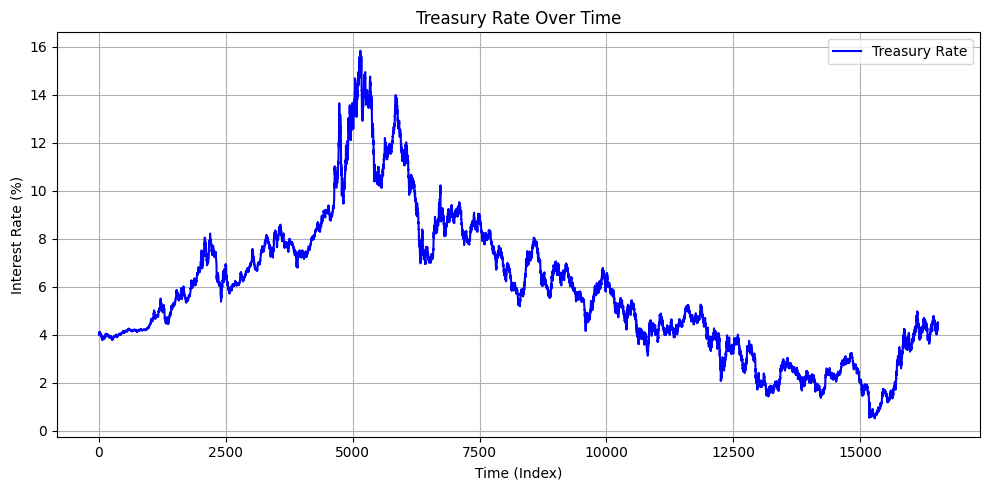

method: estimate_two_step_gmm
Estimated parameters: [ 1.27730467e-03 -2.17528518e-04  8.72536460e-05  9.95256167e-01]


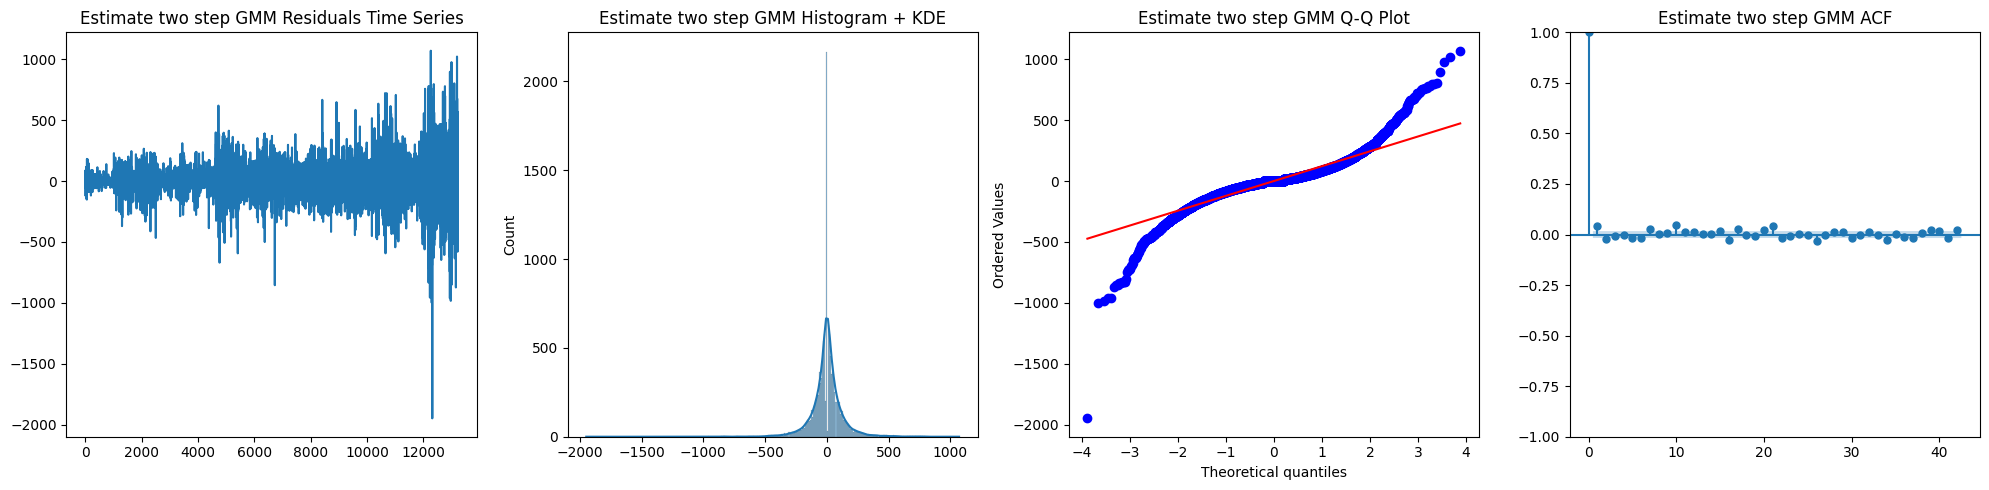


| Test               | Null Hypothesis                      | If p < 0.05                   |
|--------------------|--------------------------------------|-------------------------------|
| Mean Zero (t-test) | Residuals have mean zero             | Bias exists (bad fit)         |
| Ljung-Box          | No autocorrelation in residuals      | Residuals are autocorrelated  |
| Breusch-Pagan      | Homoscedasticity (constant variance) | Residuals are heteroscedastic |
| Jarque-Bera        | Residuals are normally distributed   | Non-normal residuals          |


Estimate two step GMM Residuals:

Mean Zero Test: t = -0.076, p = 0.939 → Mean zero
[Ljung-Box] Q(10) = 21.307, p = 0.000 → Autocorr detected

Breusch-Pagan Test:
[Breusch–Pagan] p = 0.000 → Heteroskedasticity detected

Jarque-Bera Normality Test: JB stat = 74645.773, p = 0.000 → Non-normal

Backtesting Out-of-sample RMSE: 0.0026


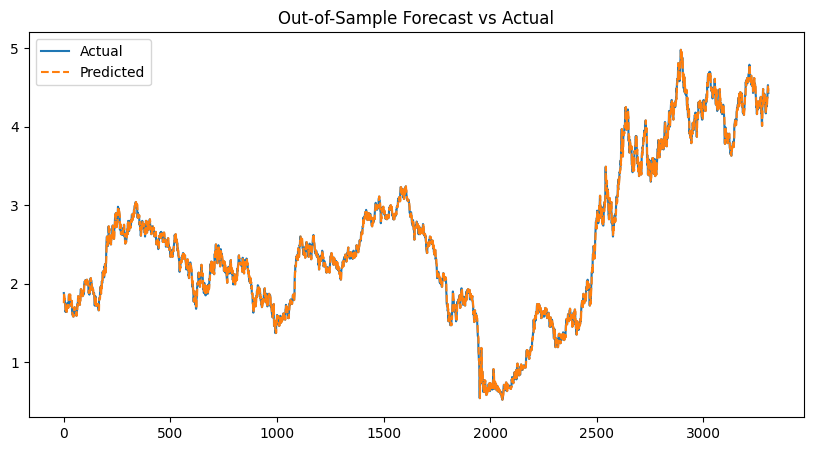

method: estimate_gmm
Estimated parameters: [ 1.27398732e-03 -2.16943532e-04  8.77019002e-05  9.93940927e-01]


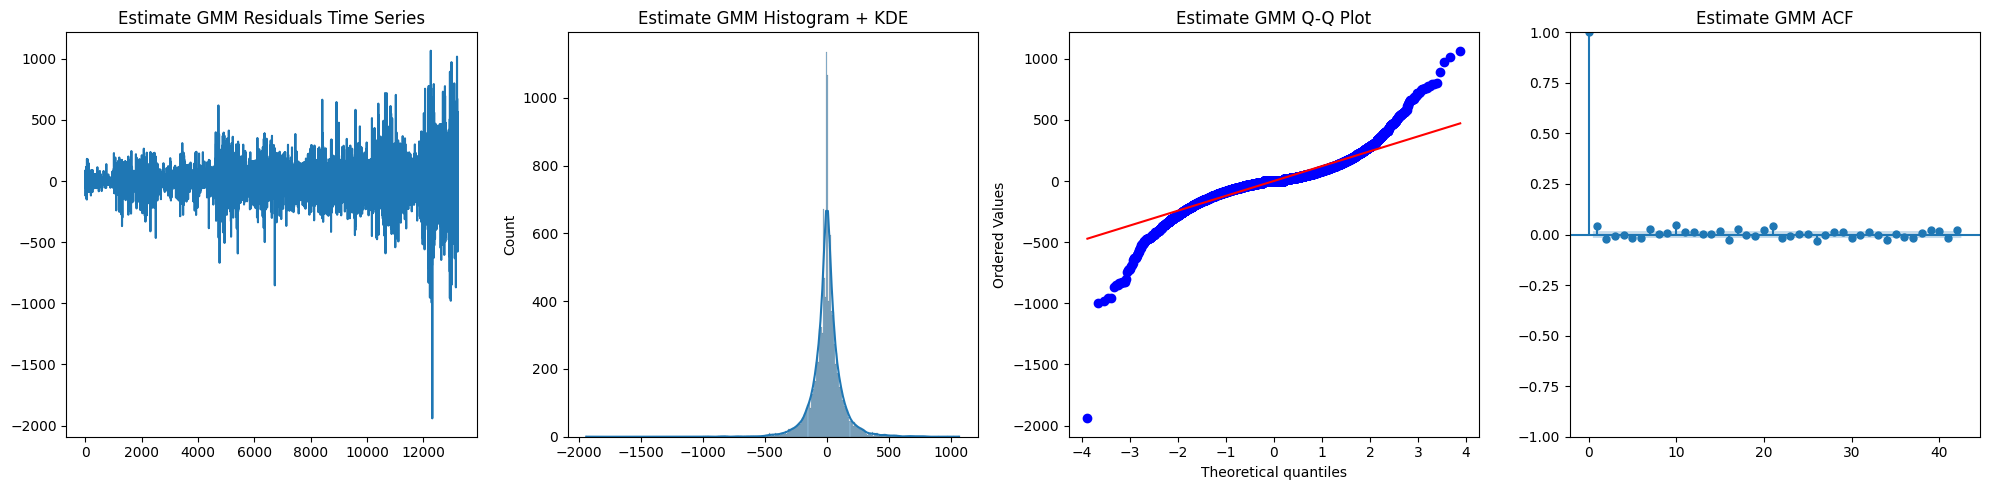


| Test               | Null Hypothesis                      | If p < 0.05                   |
|--------------------|--------------------------------------|-------------------------------|
| Mean Zero (t-test) | Residuals have mean zero             | Bias exists (bad fit)         |
| Ljung-Box          | No autocorrelation in residuals      | Residuals are autocorrelated  |
| Breusch-Pagan      | Homoscedasticity (constant variance) | Residuals are heteroscedastic |
| Jarque-Bera        | Residuals are normally distributed   | Non-normal residuals          |


Estimate GMM Residuals:

Mean Zero Test: t = -0.076, p = 0.939 → Mean zero
[Ljung-Box] Q(10) = 21.345, p = 0.000 → Autocorr detected

Breusch-Pagan Test:
[Breusch–Pagan] p = 0.000 → Heteroskedasticity detected

Jarque-Bera Normality Test: JB stat = 74314.954, p = 0.000 → Non-normal

Backtesting Out-of-sample RMSE: 0.0026


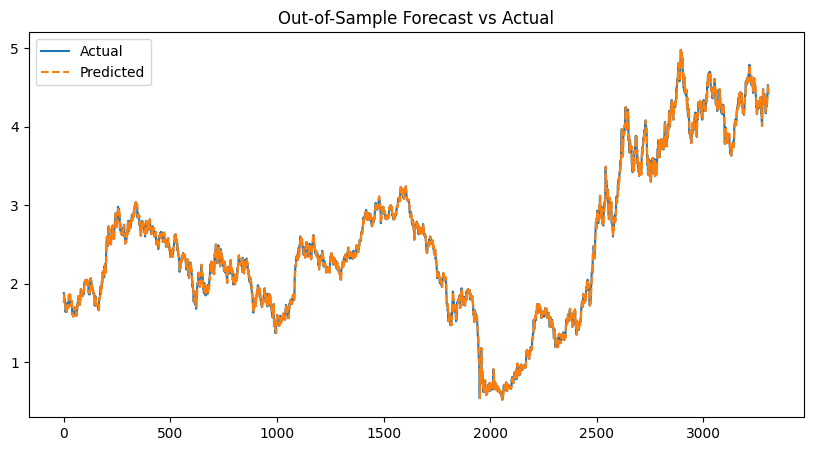

Data: Weekly
Size of the data:  522


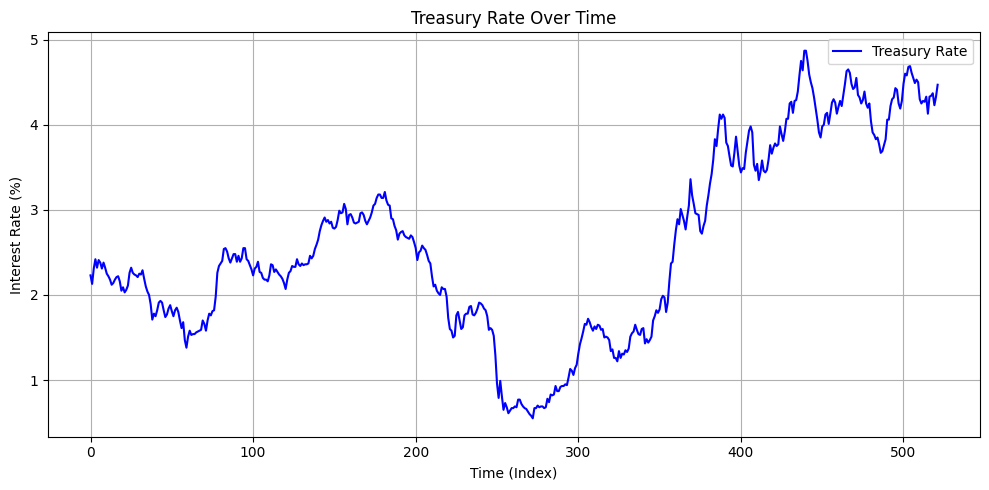

method: estimate_two_step_gmm
Estimated parameters: [ 0.00955068 -0.00305387  0.00418599  0.43375816]


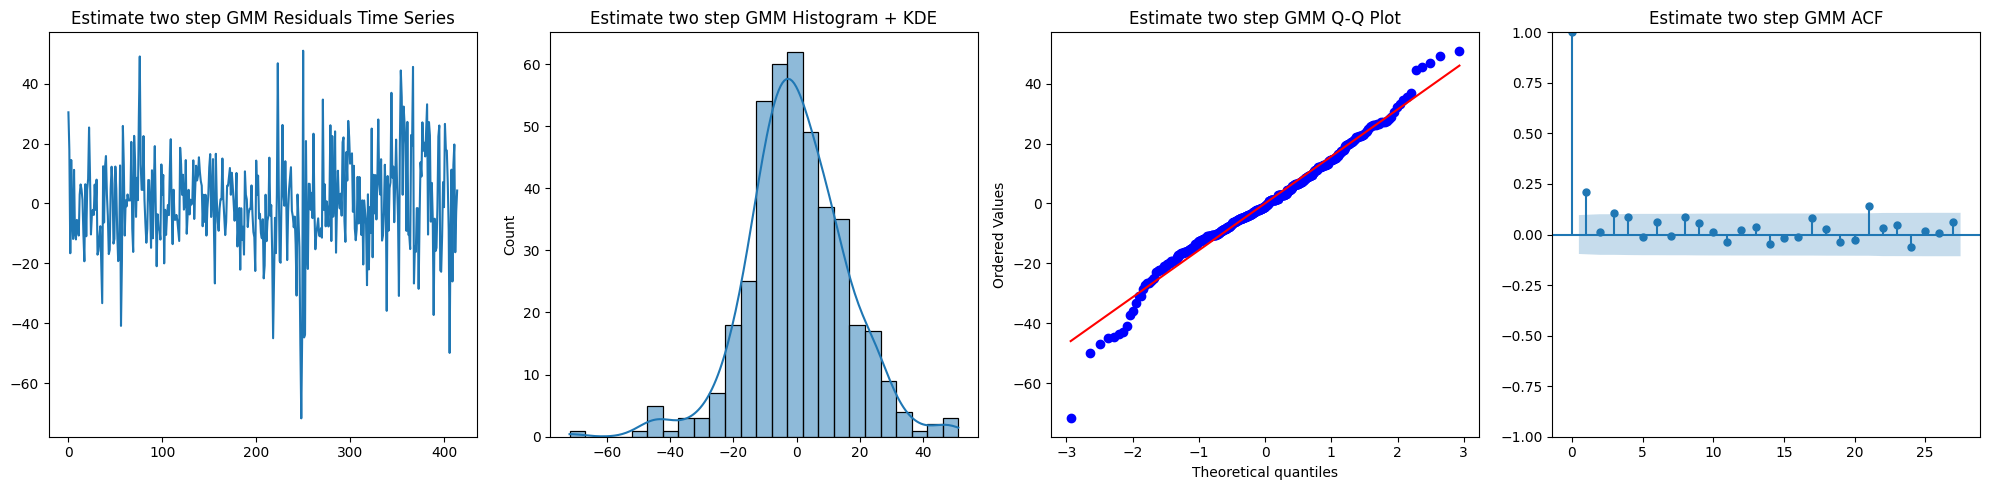


| Test               | Null Hypothesis                      | If p < 0.05                   |
|--------------------|--------------------------------------|-------------------------------|
| Mean Zero (t-test) | Residuals have mean zero             | Bias exists (bad fit)         |
| Ljung-Box          | No autocorrelation in residuals      | Residuals are autocorrelated  |
| Breusch-Pagan      | Homoscedasticity (constant variance) | Residuals are heteroscedastic |
| Jarque-Bera        | Residuals are normally distributed   | Non-normal residuals          |


Estimate two step GMM Residuals:

Mean Zero Test: t = 0.048, p = 0.962 → Mean zero
[Ljung-Box] Q(10) = 18.846, p = 0.000 → Autocorr detected

Breusch-Pagan Test:
[Breusch–Pagan] p = 0.225 → Homoskedastic

Jarque-Bera Normality Test: JB stat = 49.013, p = 0.000 → Non-normal

Backtesting Out-of-sample RMSE: 0.0120


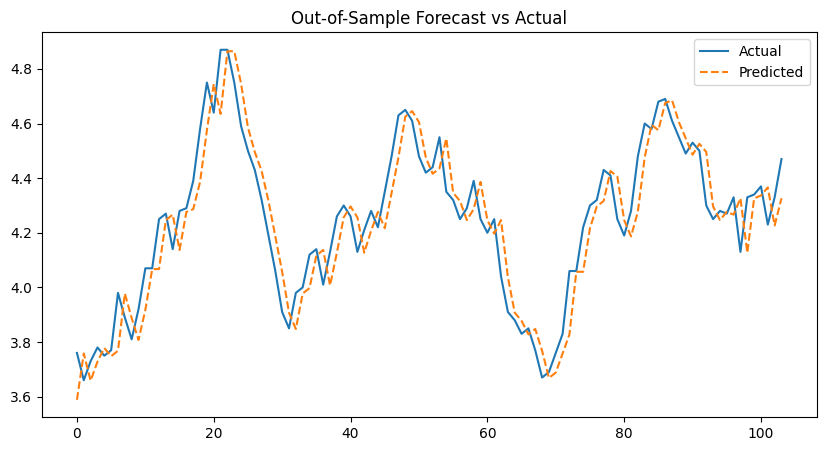

method: estimate_gmm
Estimated parameters: [ 0.00955038 -0.00305372  0.00418607  0.433747  ]


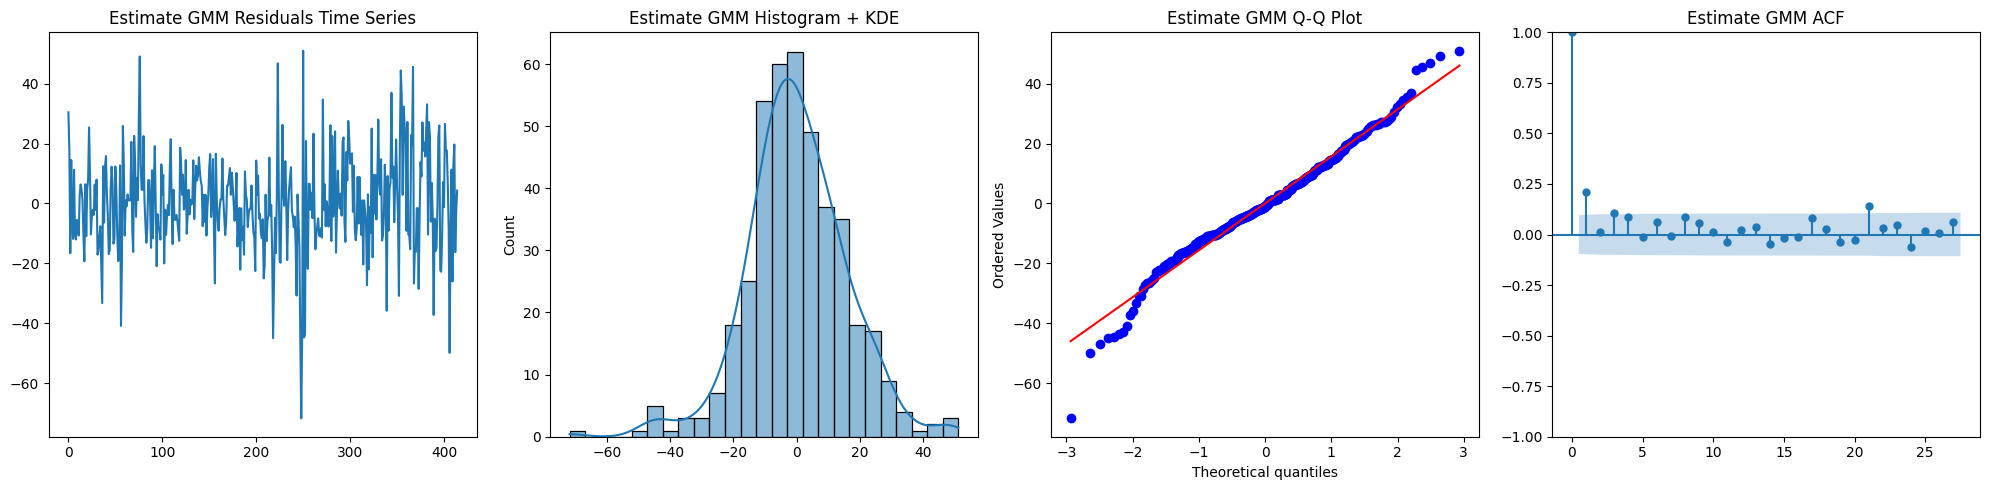


| Test               | Null Hypothesis                      | If p < 0.05                   |
|--------------------|--------------------------------------|-------------------------------|
| Mean Zero (t-test) | Residuals have mean zero             | Bias exists (bad fit)         |
| Ljung-Box          | No autocorrelation in residuals      | Residuals are autocorrelated  |
| Breusch-Pagan      | Homoscedasticity (constant variance) | Residuals are heteroscedastic |
| Jarque-Bera        | Residuals are normally distributed   | Non-normal residuals          |


Estimate GMM Residuals:

Mean Zero Test: t = 0.048, p = 0.962 → Mean zero
[Ljung-Box] Q(10) = 18.846, p = 0.000 → Autocorr detected

Breusch-Pagan Test:
[Breusch–Pagan] p = 0.225 → Homoskedastic

Jarque-Bera Normality Test: JB stat = 49.012, p = 0.000 → Non-normal

Backtesting Out-of-sample RMSE: 0.0120


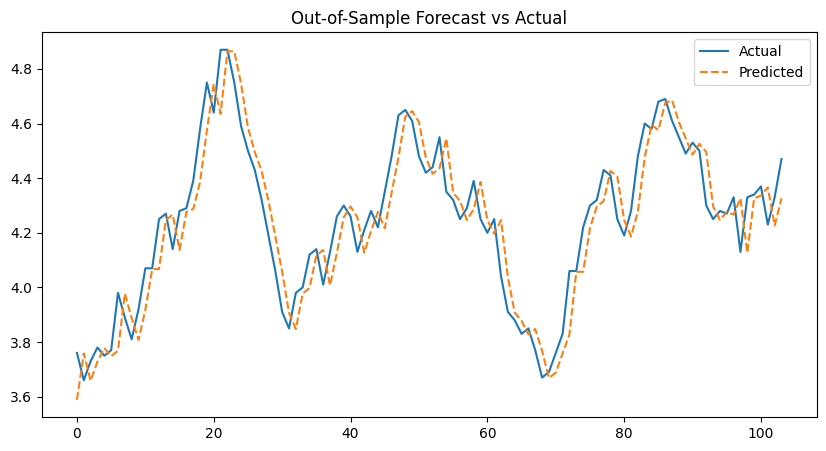

Data: Monthly
Size of the data:  286


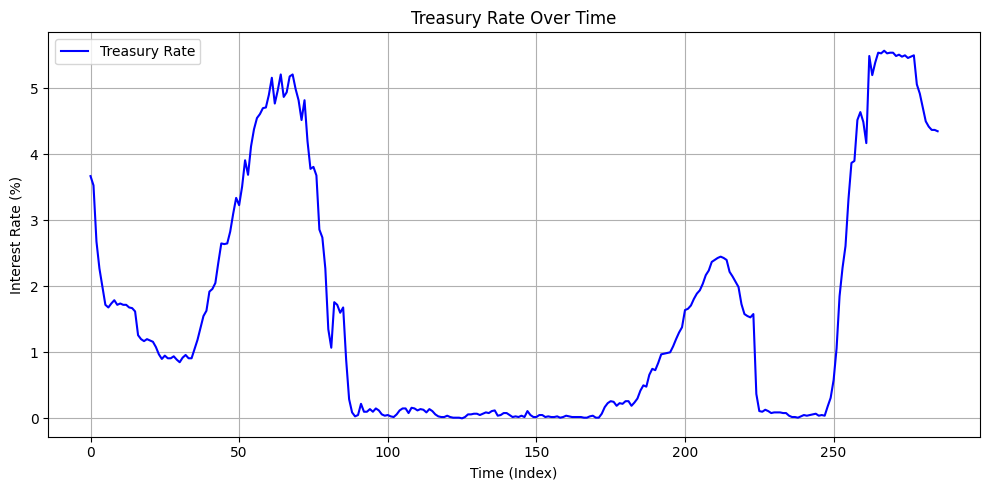

method: estimate_two_step_gmm
Estimated parameters: [ 0.00215119 -0.01371344  0.04032019  0.32536812]


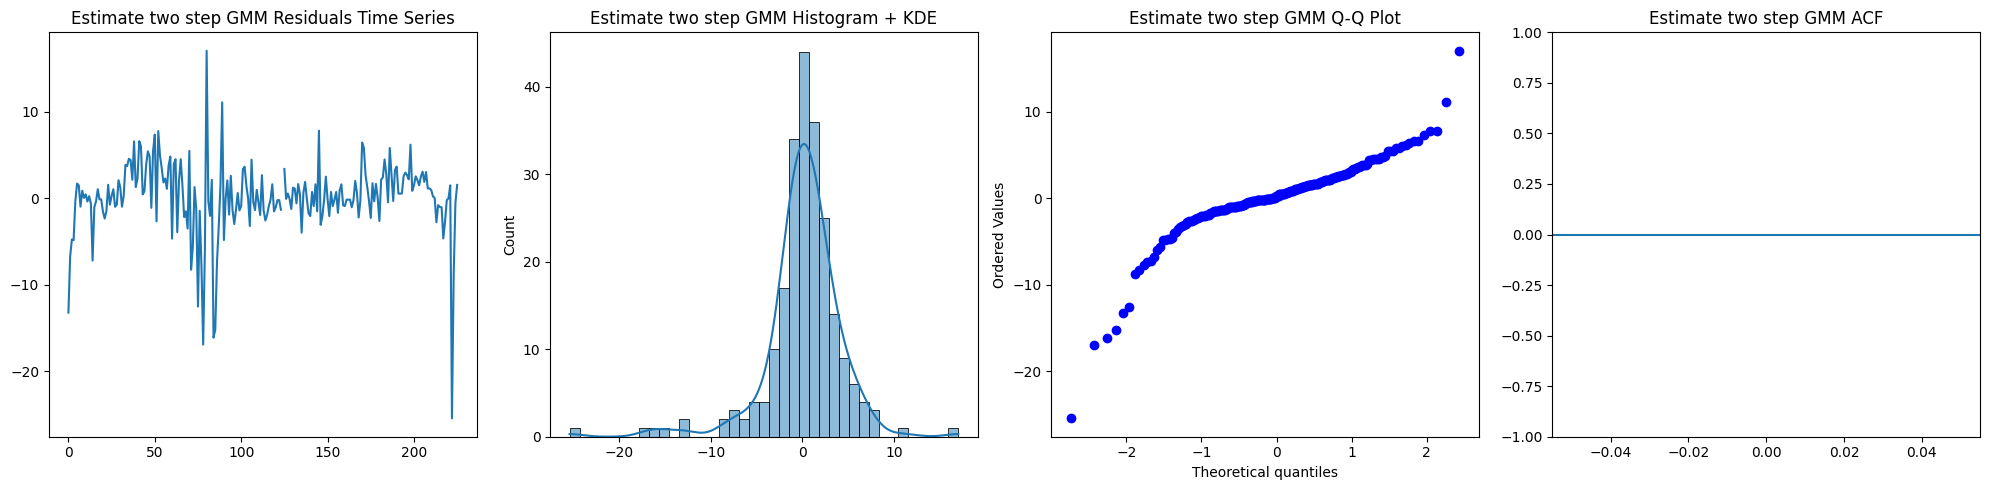


| Test               | Null Hypothesis                      | If p < 0.05                   |
|--------------------|--------------------------------------|-------------------------------|
| Mean Zero (t-test) | Residuals have mean zero             | Bias exists (bad fit)         |
| Ljung-Box          | No autocorrelation in residuals      | Residuals are autocorrelated  |
| Breusch-Pagan      | Homoscedasticity (constant variance) | Residuals are heteroscedastic |
| Jarque-Bera        | Residuals are normally distributed   | Non-normal residuals          |


Estimate two step GMM Residuals:

Mean Zero Test: t = nan, p = nan → Mean not zero
[Ljung-Box] Q(10) = nan, p = nan → Autocorr detected

Breusch-Pagan Test:
[Breusch–Pagan] p = nan → Heteroskedasticity detected

Jarque-Bera Normality Test: JB stat = nan, p = nan → Non-normal

Backtesting Out-of-sample RMSE: 0.0897


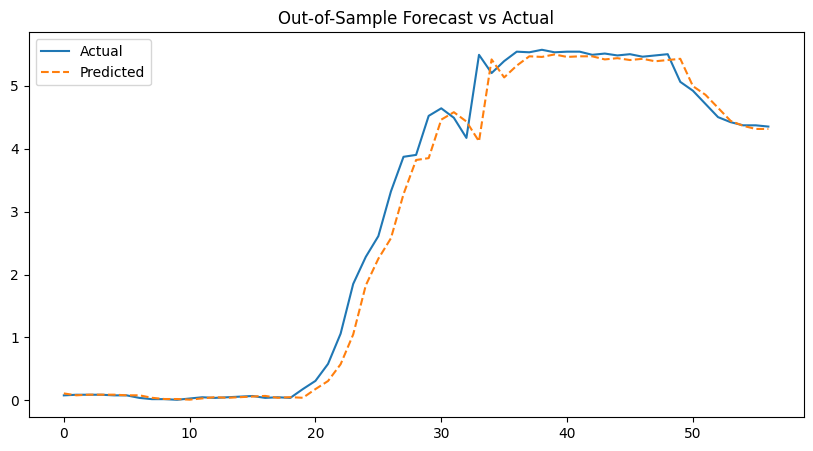

method: estimate_gmm
Estimated parameters: [ 0.00215119 -0.01371343  0.04032021  0.32536804]


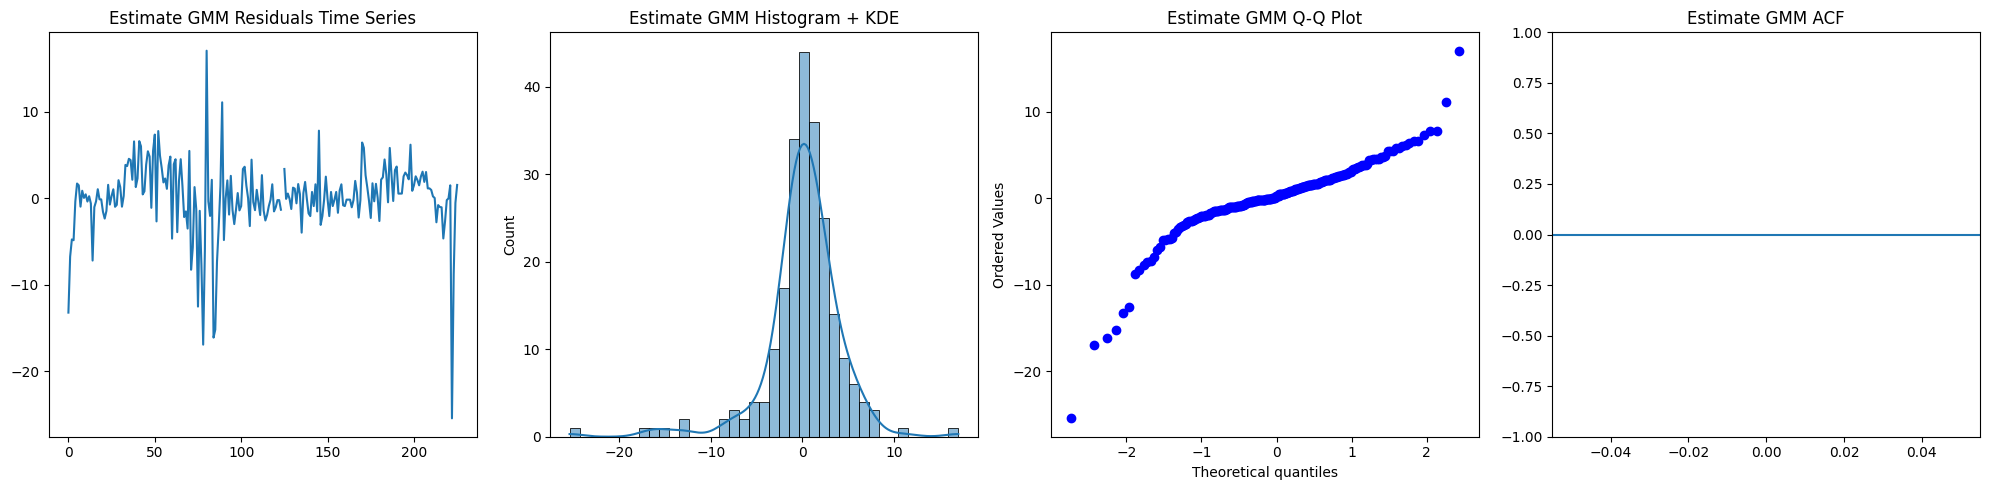


| Test               | Null Hypothesis                      | If p < 0.05                   |
|--------------------|--------------------------------------|-------------------------------|
| Mean Zero (t-test) | Residuals have mean zero             | Bias exists (bad fit)         |
| Ljung-Box          | No autocorrelation in residuals      | Residuals are autocorrelated  |
| Breusch-Pagan      | Homoscedasticity (constant variance) | Residuals are heteroscedastic |
| Jarque-Bera        | Residuals are normally distributed   | Non-normal residuals          |


Estimate GMM Residuals:

Mean Zero Test: t = nan, p = nan → Mean not zero
[Ljung-Box] Q(10) = nan, p = nan → Autocorr detected

Breusch-Pagan Test:
[Breusch–Pagan] p = nan → Heteroskedasticity detected

Jarque-Bera Normality Test: JB stat = nan, p = nan → Non-normal

Backtesting Out-of-sample RMSE: 0.0897


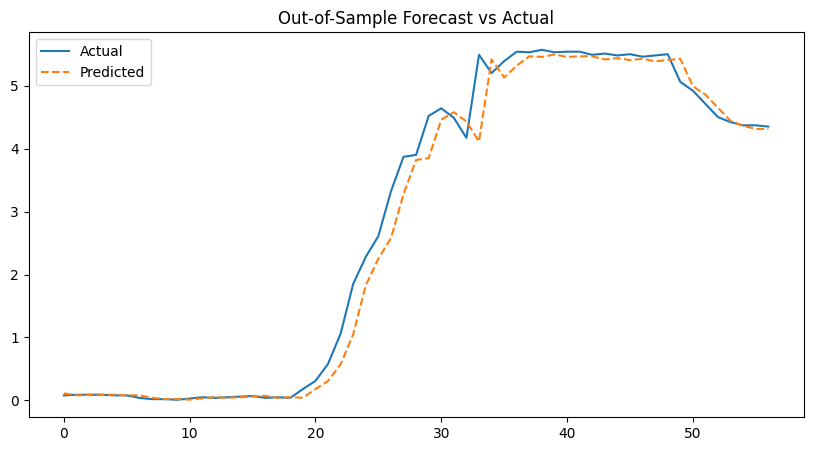

In [87]:
total_data = [data_daily, data_weekly, data_monthly]
total_data_names = ['Daily', 'Weekly', 'Monthly']
for i, data in enumerate(total_data):
    print(f"Data: {total_data_names[i]}")
    rate_prediction(data)